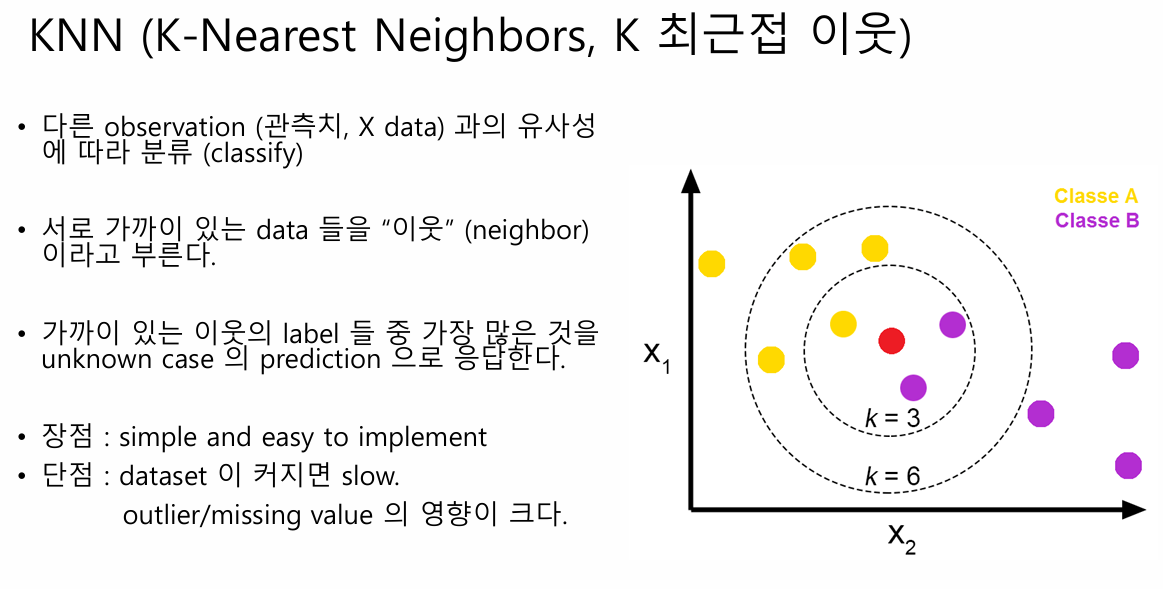

In [1]:
# 이미지 삽입
from IPython.display import Image
Image("img/img04_03.png", width=800)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error

Best k: 11
R^2 score: 0.6805629031793323
Mean Absolute Error: 0.43843182302677935


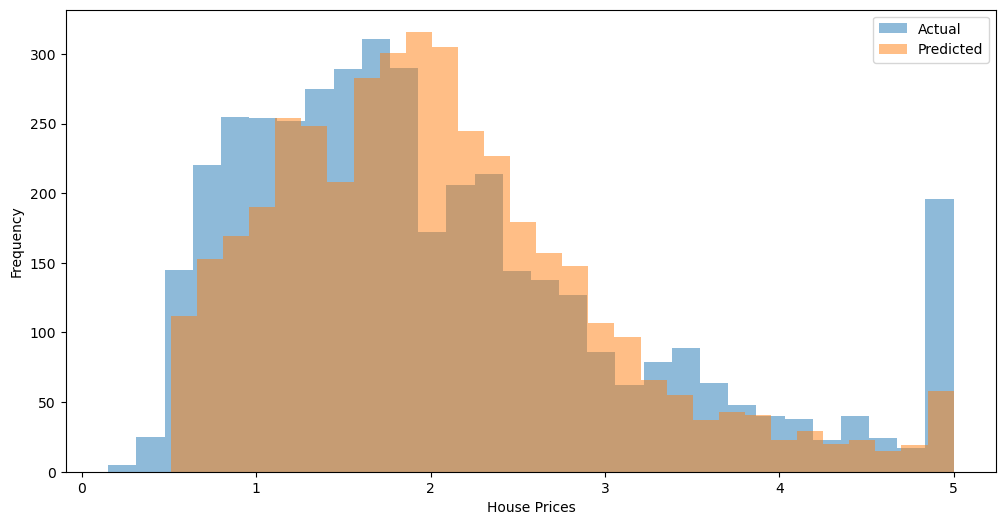

In [9]:
# Load the data
california = fetch_california_housing()
x, y = california.data, california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNeighborsRegressor
knn = KNeighborsRegressor()

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 30)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best parameter
best_k = grid_search.best_params_['n_neighbors']

# Train the model with the best parameter
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predict the test set
y_pred = knn_best.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("Best k:", best_k)
print("R^2 score:", r2)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.hist(y_test, bins=30, alpha=0.5, label="Actual")
plt.hist(y_pred, bins=30, alpha=0.5, label="Predicted")
plt.xlabel("House Prices")
plt.ylabel("Frequency")
plt.legend()
plt.show()